# Categorical Regression | Multinomial Response 

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from scipy.stats import logistic
%matplotlib inline

In [2]:
#### Simulate multinomial regression
np.random.seed (245)

### Covariate Matrix
nobs =50000 # number of observation was 500000

#x1 as intercept because np.ones return array of 1,x2 as normal distributed numbers (np.random.normal give me normal distributed numbers with mean=0)
# كما تعلم انه مصفوفة الاكسات تحط اول عمود ١ لانه وقت تضرب بمصفوفة البيتات في بيتا صفر اللي هو عباره عن كونستانت ثابت فحتى تتم عملية الضرب لازم تضيف عنصر مشان تزبط عملية الضرب حميد
X=pd.concat([pd.DataFrame(np.ones(nobs)),pd.DataFrame(np.random.normal(loc=0,size=nobs))],axis=1) 
X.columns=['const','X1']
X.head()

,const,X1
0,1.0,-0.232767
1,1.0,0.818530
2,1.0,-0.973349
3,1.0,-0.093619
4,1.0,1.223941


In [3]:
### Coefficients اقدر اختار قيم عشوائية عدا معاملات الريفرنس كاتيغوري 
### افترض بيتات التي تنتج واي واحد اللي هو الريفرنس كاتيغوري طبعا هو صفر بالنهاية لذلك بيتاته صفر 
### افترض بيتات التي تنتج واي ٢ وكذلك الوضع بالنسبة لواي ٣

Coef_Label1 =[0,0] # in Multinomial-Logit habe immer Referenz Kategorie->d.h bei dieser Referenz Kategorie müssen Koeffifziente immer 0 sein-> d.h wenn ich hier die Koeffizient von x0 (meine Konstante) auf null setze,*** ask 
Coef_Label2 =[1,2]
Coef_Label3 =[0.5,3]

# reference category muss immer 0 sein (ich beschreibe Effekt von Label2/y2 und Label3/y3 im Verhältnis zu Label1/y1)
# das haben wi implizit beim Logit gemacht -> die Koeffizient für y=0 dementsprechend auch 0!

$$\mathbb{P}(y_{ir}=r|x_{i})= \pi_{ir}=  \frac{\exp(\boldsymbol{x}_i \boldsymbol{\beta_{r}})}{1 +  \sum_{s=1}^{q} \exp(\boldsymbol{x}_i \boldsymbol{\beta_{s}})}  \qquad r=1,\dots,q$$

In [4]:
### Vector of probabilities so the observation i belongs to one of the categories r 

Prob1=                     1/(1+np.exp(X@Coef_Label2)+np.exp(X@Coef_Label3)) # Vektor an Wahrscheinlichkeiten (Referenz Kategorie)
Prob2=np.exp(X@Coef_Label2 )/(1+np.exp(X@Coef_Label2)+np.exp(X@Coef_Label3)) # Vektor an Wahrscheinlichkeiten
Prob3=np.exp(X@Coef_Label3 )/(1+np.exp(X@Coef_Label2)+np.exp(X@Coef_Label3)) # Vektor an Wahrscheinlichkeiten



Probs=pd.concat([Prob1 ,Prob2 ,Prob3],axis=1)
#print(Prob1.head())
#print(Prob2.head())
#print(Prob2.head())
print(Probs.head()) # wenn ich jedes i die 100% Wahr. zwischen 3 Kategorien
# für jedes i Wahr. zu Kategorie 0/Label1 oder zu Kategorie 1/Label2 oder zu Kategorie 2/Label3 gehört

          0         1         2
0  0.283555  0.483896  0.232549
1  0.029252  0.408718  0.562030
2  0.677077  0.262719  0.060204
3  0.222265  0.501013  0.276722
4  0.010281  0.323169  0.666550


In [5]:
#Coef_Label2
#X@Coef_Label2

In [6]:
### Vector of probabilities (Alternative) عجبني اكثر
#Prob1=np.exp(X@Coef_Label1 )/(np.exp(X@Coef_Label1)+np.exp(X@Coef_Label2)+np.exp(X@Coef_Label3))
#Prob2=np.exp(X@Coef_Label2 )/(np.exp(X@Coef_Label1)+np.exp(X@Coef_Label2)+np.exp(X@Coef_Label3))
#Prob3=np.exp(X@Coef_Label3 )/(np.exp(X@Coef_Label1)+np.exp(X@Coef_Label2)+np.exp(X@Coef_Label3))
#Probs=pd.concat([Prob1 ,Prob2 ,Prob3],axis=1)


In [8]:
# Multinomial Verteilung gibt nicht nur ein pe sondern ein Vektor an Wahrscheinlichkeiten!
# ich generiere Zufallszahl von Multinomialverteilung und ich generiere Labels 1,2 oder 3 basierend auf Wahrscheinlichkeiten، die durch x*beta gegeben ist!
# jede Wahrscheinlichkeit wird zu einer Label geordnet القصة اني رح انسب كل مشاهدة صنف معين

y=Probs.apply(lambda i: np.random.multinomial(1,pvals=i,size=1),axis=1) 
y=pd.DataFrame(np.concatenate(y,axis=0),columns=['A','B','C'])



In [10]:
#np.random.multinomial(1,pvals=i,size=1)

In [11]:
y.head() # First one is droped during estmation!


,A,B,C
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0


In [10]:
mdl = sm.MNLogit(y, X) # Multinomial logit model
mdl_fit = mdl.fit()    # Fit the model using maximum likelihood
print(mdl_fit.summary ())

Optimization terminated successfully.
         Current function value: 0.811584
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                50000
Model:                        MNLogit   Df Residuals:                    49996
Method:                           MLE   Df Model:                            2
Date:                Fri, 27 Dec 2019   Pseudo R-squ.:                  0.2593
Time:                        23:40:36   Log-Likelihood:                -40579.
converged:                       True   LL-Null:                       -54784.
Covariance Type:            nonrobust   LLR p-value:                     0.000
       y=B       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9949      0.017     59.418      0.000       0.962       1.028
X1             1.9954      0.

## Comparison with sequential Logit Regressions

In [12]:
DF=pd.concat([y,X],axis=1)
DF_B=DF[DF.C ==0]
logit = sm.Logit(DF_B.B,DF_B['const X1'.split ()])
logit_model=logit.fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.485711
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      B   No. Observations:                33420
Model:                          Logit   Df Residuals:                    33418
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.2958
Time:                        20:15:31   Log-Likelihood:                -16232.
converged:                       True   LL-Null:                       -23051.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9720      0.017     57.834      0.000       0.939       1.005
X1             1.9994      0.

In [13]:
DF_C=DF[DF.B ==0]
logit = sm.Logit(DF_C.C,DF_C['const X1'.split ()])
logit_model=logit.fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.314735
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      C   No. Observations:                31911
Model:                          Logit   Df Residuals:                    31909
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.5454
Time:                        20:15:37   Log-Likelihood:                -10044.
converged:                       True   LL-Null:                       -22095.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4813      0.019     25.806      0.000       0.445       0.518
X1             3.0288      0.

# Categorical Regression | Ordinal Response

$$y_i^{*}=\boldsymbol{x_{i}\beta} +\epsilon_i, \qquad \epsilon_i \sim \text{Logistic (0,1)} \\$$
$$
y_i = \begin{cases} 1 & \text{if } y_i^{*} \leq \theta_1 \\ 
2 & \text{if } \theta_1 < y_i^{*} \leq \theta_2 \\ 
\vdots & \vdots \\
j & \theta_{j-1} < y_i^{*}\end{cases}$$

je nach dem in welchen Bereich mein y* fällt, ordne ich die Kategorie -> was ich brauche? ich brauche verschiedene threshold(die Grenze, ab dem mein y* in neue Kategorie wird) und brauche ich beta1 und beta2

In [14]:
import mord
##Thresholds
theta1=-1.5
theta2=-0.5
theta3 =0.5
theta4 =1.5
### other coefficients
beta1=1
beta2=3

### Calculate the linear predictor



$$		\text{ln}\frac{\sum_{s=1}^{r}\pi_{ is }}{1- \sum_{s=1}^{q}\pi_{ is }}= \theta_r - \boldsymbol{x_{i}\beta}, \qquad r =1,\dots,q$$

dann simuliere ich linear predictor 

In [15]:
### simulate the independent variables/features
nobs =50000
x1=np.random.normal(size=nobs)
x2=np.random.uniform(size=nobs)

### calculate the linear predictors
linpred1= theta1 - (beta1*x1 + beta2*x2)
linpred2= theta2 - (beta1*x1 + beta2*x2)
linpred3= theta3 - (beta1*x1 + beta2*x2)
linpred4= theta4 - (beta1*x1 + beta2*x2)

#print(linpred1)
#print(linpred2)

### Calculate the probability

hier wird die Wahrscheinlichkeit durch diese Form berechnet, dass bestimmtes i in diese Kategorie zugeordnet werden kann

$$\pi_{ i1 } = \mathbb{P}(y_i =1|x_i) = F(\theta_1 -\boldsymbol{x_{i}\beta}) \\
\pi_{ ir } = \mathbb{P}(y_i =r|x_i) = F(\theta_r -\boldsymbol{x_{i}\beta}) -F(\theta_{r-1} -\boldsymbol{x_{i}\beta}) \\
\pi_{ ij } = \mathbb{P}(y_i =j|x_i) = 1 -  F(\theta_q -\boldsymbol{x_{i}\beta}) $$
طبعا انت تحسب مساحة هون عن طريق التكامل

In [16]:
pi1=logistic.cdf(linpred1) #Cumulative distribution function of the given RV.


pi2=logistic.cdf(linpred2)-logistic.cdf(linpred1)
pi3=logistic.cdf(linpred3)-logistic.cdf(linpred2)
pi4=logistic.cdf(linpred4)-logistic.cdf(linpred3)

pi5=1- logistic.cdf(linpred4)

#print(pi1)
#print(pi2)

In [17]:
PI=pd.concat([pd.DataFrame(pi1),pd.DataFrame(pi2),pd.DataFrame(pi3),pd.DataFrame(pi4),pd.DataFrame(pi5)],axis=1)

y=PI.apply(lambda i: np.random.multinomial(1,pvals=i,size=1),axis=1)# Also ordinal variables follow the multinomial dist.
y=pd.DataFrame(np.concatenate(y,axis=0))


y_flat = (y.iloc[:, :] == 1).idxmax(1)#Convert to 1d-vector as required by mord library!

X=pd.concat([pd.DataFrame(x1),pd.DataFrame(x2)],axis=1)

In [18]:
y.head(10) # ich habe ein Vektor mit 0 und 1 je nachdem in welche Kategorie mein y* im Endeffekt fällt!

,0,1,2,3,4
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
5,0,0,0,0,1
6,0,0,1,0,0
7,0,0,1,0,0
8,0,0,0,0,1
9,1,0,0,0,0


In [19]:
y_flat.head(10) # Direkte Ergebniss: also zu welchem Kategorie gehört jede Beobachtung

0    4
1    4
2    1
3    2
4    1
5    4
6    2
7    2
8    4
9    0
dtype: int64

In [22]:
ord_Logit = mord.LogisticAT(alpha =0.)
ord_Logit.fit(X, y_flat)
print("Regression coefficients: " + str(ord_Logit.coef_))
print("Thresholds: " + str(ord_Logit.theta_))

Regression coefficients: [0.99113633 2.99142189]
Thresholds: [-1.49014586 -0.50288962  0.47659476  1.48506739]


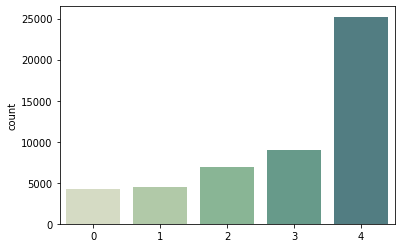

In [23]:
### Plot of the true y, most of the observation fall in the a last label/y/Katgorie
import scipy
import seaborn as sns
histogram=sns.countplot(y_flat ,palette=sns.cubehelix_palette(8, start=.5, rot=-.75))

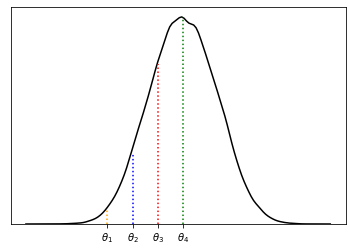

In [24]:
### Density of y_star -> Die Verteilung von y*/latente Variable-> je nachdem wo mein y* liegt, bin ich in Kategorie 1 oder 2...
### wenn ich die Wahrscheinlichkeit für ein bestimmtes Label/y/Kategorie berechnen will, kann ich diese Fläche als Integral bspw. von theta1 bis zum theta2

y_star= X@[beta1 , beta2]
figure = sns.distplot(y_star , hist=False ,color='black')


figure.set_xticks((-1.5, -0.5, 0.5 , 1.5))
figure.set_xticklabels((r'$\theta_ {1}$', r'$\theta_2$', r'$\theta_3$', r'$\theta_4$'))
figure.set_yticks ([])
figure.axvline(-1.5, 0, 0.07, linestyle="dotted",color='orange')
figure.axvline(-0.5, 0, 0.325, linestyle="dotted",color='blue')
figure.axvline(0.5, 0, 0.735, linestyle="dotted",color='red')
figure.axvline(1.5, 0, 0.95, linestyle="dotted",color='green')

diese Integral ist nicht anders als diese Vorschriften

$$\pi_{ i1 } = \mathbb{P}(y_i =1|x_i) = F(\theta_1 -\boldsymbol{x_{i}\beta}) \\
\pi_{ ir } = \mathbb{P}(y_i =r|x_i) = F(\theta_r -\boldsymbol{x_{i}\beta}) -F(\theta_{r-1} -\boldsymbol{x_{i}\beta}) \\
\pi_{ ij } = \mathbb{P}(y_i =j|x_i) = 1 -  F(\theta_q -\boldsymbol{x_{i}\beta}) $$

Damit kriege ich die Fläche, die mir die Wahrscheinlichkeit für ein bestimmtes Label gibt, dass mein i in dieser Kategorie fällt

## Marginal Effects
bei Ordinal Logit kann ich die Mittlere Kategorie nicht interpretieren! nur die beste und die schlechste Kategorie!

In [25]:
deltaX_2=np.arange(0.01,1,0.01)

PI_loop=pd.DataFrame(index=deltaX_2, columns=range(5))

for q in range(len(deltaX_2)):
    x1=x1
    x2_new=x2+deltaX_2[q]

    ### calculate the linear predictors
    linpred1= theta1 - (beta1*x1 + beta2*x2_new)
    linpred2= theta2 - (beta1*x1 + beta2*x2_new)
    linpred3= theta3 - (beta1*x1 + beta2*x2_new)
    linpred4= theta4 - (beta1*x1 + beta2*x2_new)
    
    delta_pi1=logistic.cdf(linpred1)
    delta_pi2=logistic.cdf(linpred2)-logistic.cdf(linpred1)
    delta_pi3=logistic.cdf(linpred3)-logistic.cdf(linpred2)
    delta_pi4=logistic.cdf(linpred4)-logistic.cdf(linpred3)
    delta_pi5=1- logistic.cdf(linpred4)
    
    PI_loop.iloc[q,:]=pd.concat([pd.DataFrame(delta_pi1),pd.DataFrame(delta_pi2),pd.DataFrame(delta_pi3),
                              pd.DataFrame(delta_pi4),pd.DataFrame(delta_pi5)],axis=1).mean().values
    

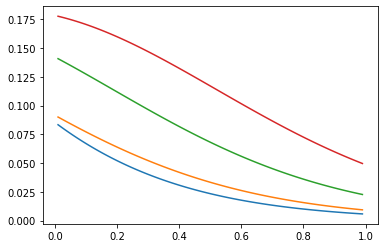

In [26]:
import matplotlib.pyplot as plt
plt.plot(PI_loop.iloc[:,0:4])

In [27]:
# وقت يكون بي مشكلة رح تتقاطع الخطوط مع بعض
# wenn ich Problem mit Marginal Effekt hätte, soltte 2 Linien kreutzen